# Breast Cancer Classification Using Machine Learning

<h3 style="text-align:center">by Subhajit Nath</h3>

## Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

## Acknowledgements:
This dataset has been referred from Kaggle.

## Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

<img src="https://images.herzindagi.info/image/2023/Oct/breast-cancer-google-queries.jpg" alt="Logo">

<span style="color:BLUE; font-size:28px;"> Let's get started! </span>

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Libraries for visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
cancer=pd.read_csv(r"C:\Users\Subhajit Nath\Downloads\breast-cancer.csv")
data=cancer.copy()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### There are two types of Breast Cancers.The diagnosis column in this data describes about the two types of Cancers.
### And they are "malignant" and "benign" which are represented as "M" and "B" in this dataset respectively


### About Dataset
### Description:
### Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

### The key challenges against it’s detection is how to classify tumors into "malignant (cancerous)" or "benign(non cancerous)".

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## EDA & VISUALIZATION

In [5]:
# Check for missing value:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

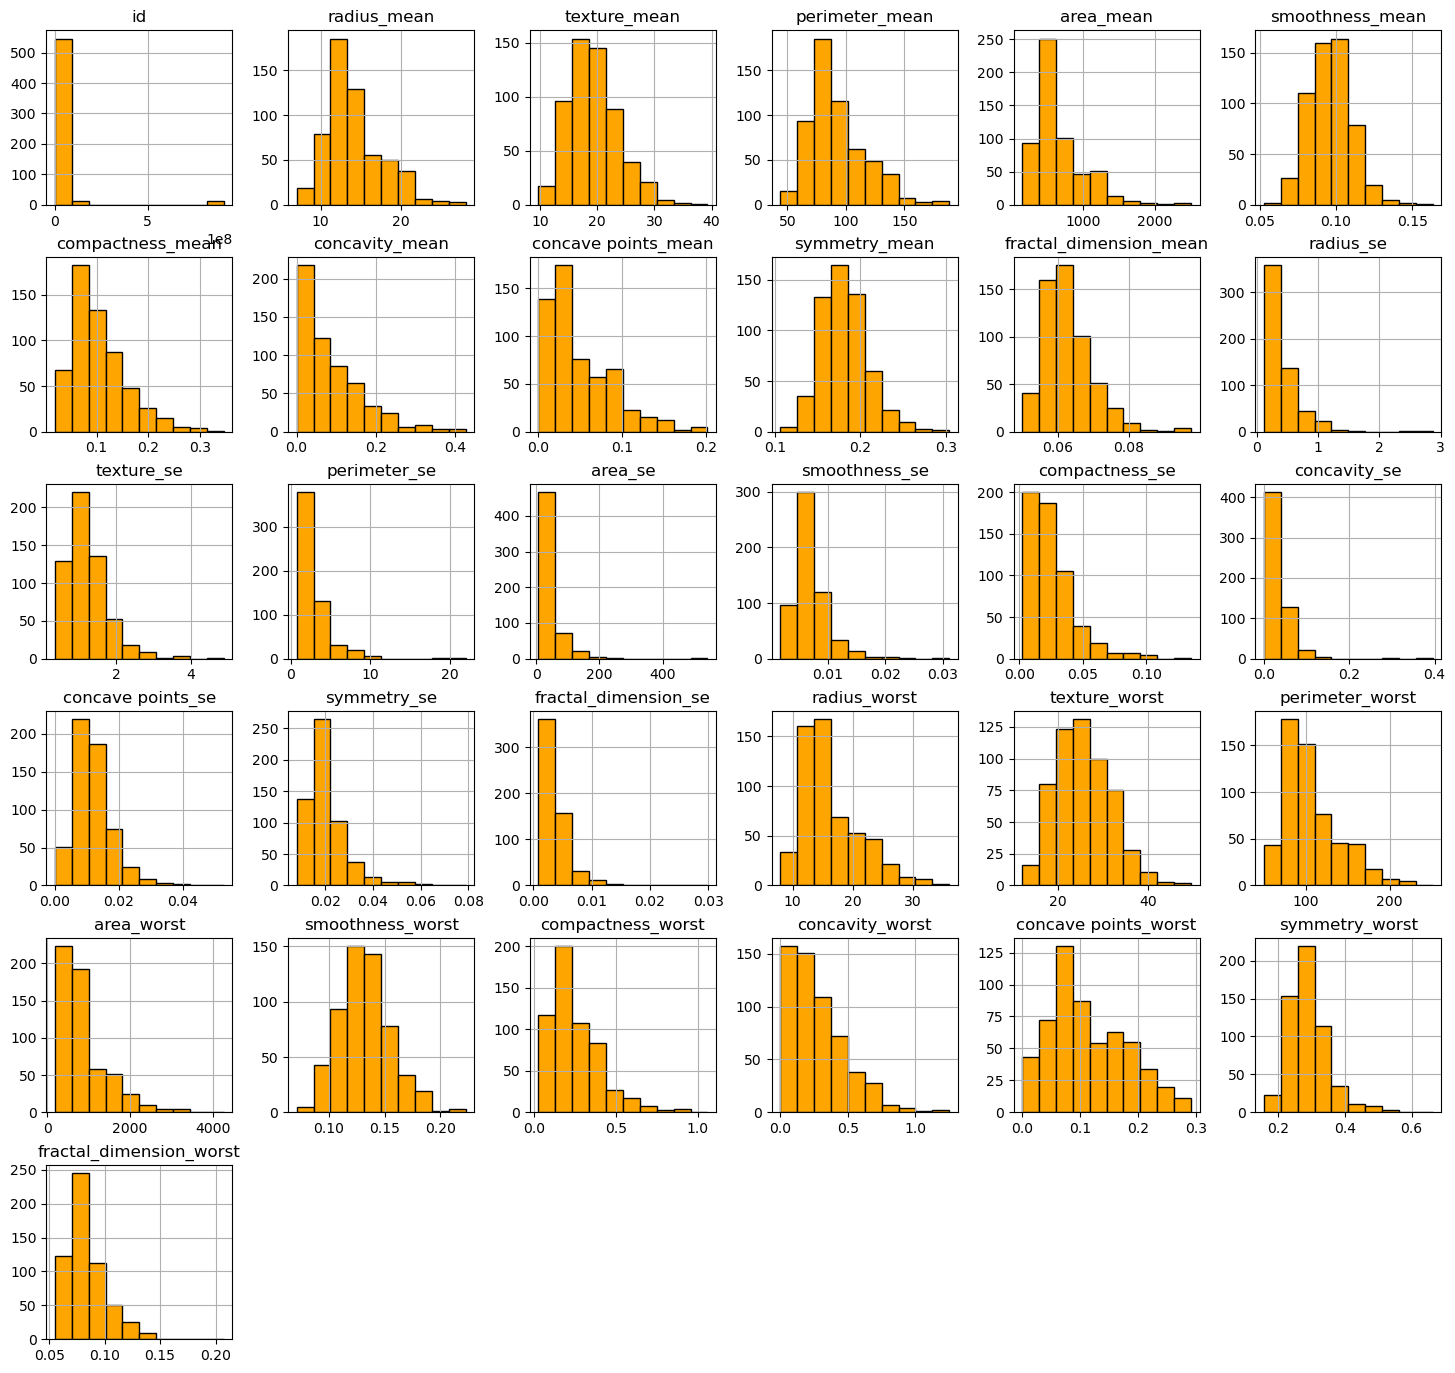

In [6]:
data.hist(figsize = (18,17),color = 'orange',edgecolor = 'black');

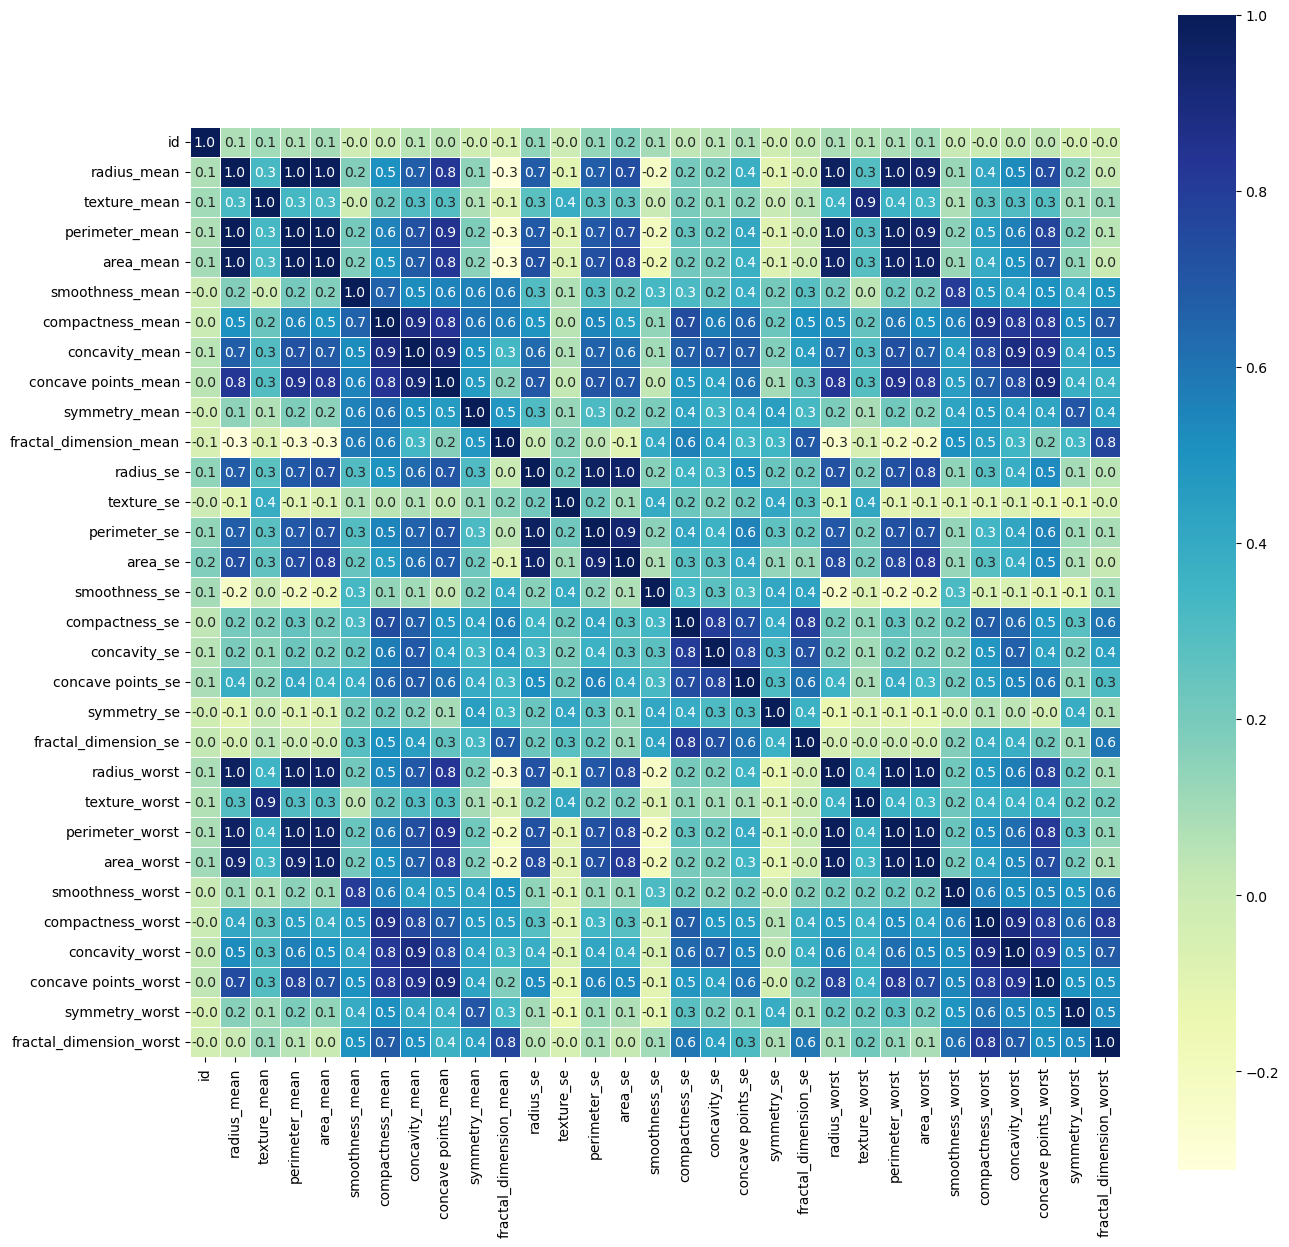

In [7]:
# Check for correlation:
corr=data.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.show()

In [8]:
print('Count of M or B cells in diagnosis:')
data['diagnosis'].value_counts()

Count of M or B cells in diagnosis:


B    357
M    212
Name: diagnosis, dtype: int64

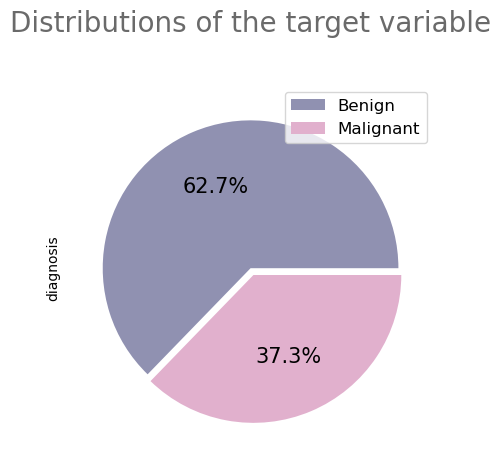

In [9]:
# Plot distribution
data['diagnosis'].value_counts().plot(kind='pie', labels = ['', ''], autopct = '%1.1F%%', colors = ['#9091b1','#e1b0cd'], 
                                    explode = [0,0.05], textprops = {'fontsize':15})
plt.legend(labels=['Benign', 'Malignant'], fontsize=12)
plt.title('Distributions of the target variable\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

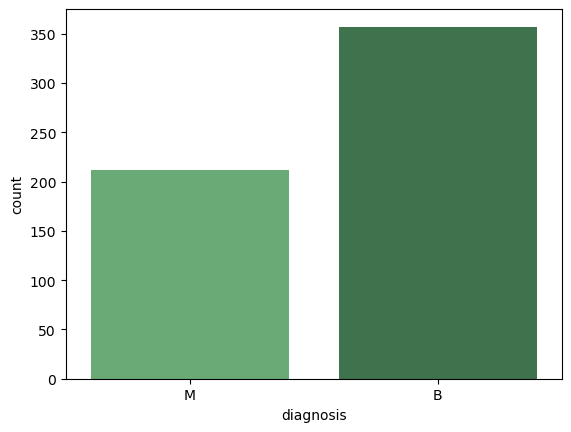

In [10]:
sns.countplot(x='diagnosis',data=data,palette='Greens_d')
plt.show()

## M for Malignant
## B for Benign

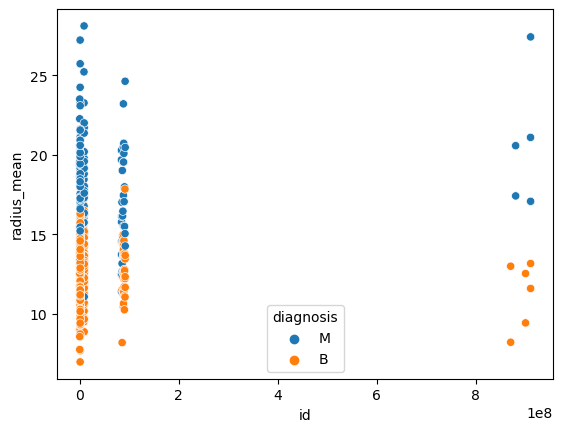

In [11]:
sns.scatterplot(x='id',y='radius_mean',data=cancer,hue='diagnosis')
plt.show()

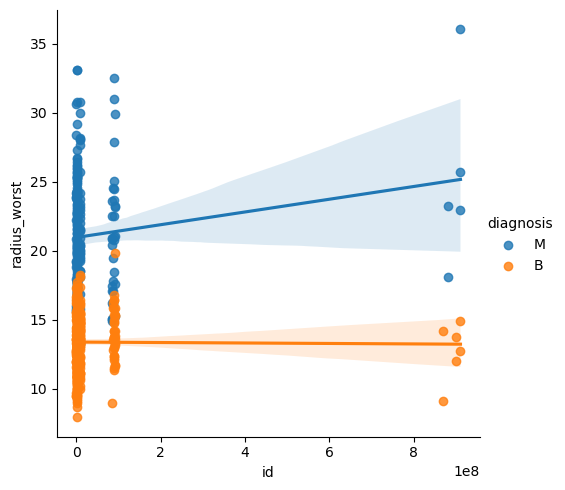

In [12]:
sns.lmplot(x='id',y='radius_worst',data=cancer,hue='diagnosis')
plt.show()

## Machine Learning

In [13]:
#Libraries for ML model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

In [14]:
data.drop(["id"],axis=1,inplace=True)
y=data["diagnosis"]
X=data.drop(["diagnosis"],axis=1)
print("X shape",X.shape)
print("y shape",y.shape)

X shape (569, 30)
y shape (569,)


In [15]:
one_hot=LabelBinarizer()
y=one_hot.fit_transform(y)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,shuffle=True)

In [17]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (398, 30)
y_train shape (398, 1)
X_test shape (171, 30)
y_test shape (171, 1)


In [18]:
# Lets create model:
def classification_models(model):
    y_pred=model.fit(X_train,y_train).predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    roc_score=roc_auc_score(y_test,y_pred)
    f1=f1_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    
    results=pd.DataFrame({"Values":[accuracy,roc_score,f1,precision,recall],
                         "Metrics":["Accuracy","ROC-AUC","F1","Precision","Recall"]})
    
    # Visualize Results:
    fig=make_subplots(rows=1,cols=1)
    fig.add_bar(x=[round(i,5) for i in results["Values"]],
                        y=results["Metrics"],
                        text=[round(i,5) for i in results["Values"]],orientation="h",textposition="inside",name="Values",
                        marker=dict(color=["khaki","bisque","palegreen","skyblue","plum"],line_color="beige",line_width=1.5),row=1,col=1)
    fig.update_layout(title={'text': model.__class__.__name__ ,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    fig.update_xaxes(range=[0,1], row = 1, col = 1)
    
    iplot(fig)
    
my_models= [
    
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()


]

for model in my_models:
    classification_models(model)
    

# Thank You
#### Thank you for going through this notebook

#### If you have any feedback please let me know